In [145]:
#RSM338 PROBLEM SET 1 
#Ethan Yixiao Wang 1008864061
#Due September 17, 2024

In [146]:
import pandas as pd
import numpy as np

In [147]:
#Question 1

In [148]:
#The file monthly.csv contains Monthly Data of portfolio returns from the combined
#NYSE/AMEX/Nasdaq over the period 1926/1–2023/12. The first column is the date
#for the end of the month (in yyyymmdd format). The second column is the value-
#weighted market return, the third column is the equal-weighted market return. The
#4th to 13th column are monthly returns from 10 size decile portfolios (sorted by market
#capitalization, from lowest to highest).
#(a) Compute the average, standard deviation, 25th, 50th, and 75th percentiles based
#on the monthly returns of the 12 portfolios.
#(b) Compute the coefficients of skewness and (excess) kurtosis based on the monthly
#returns of the 12 portfolios. For each coefficient, perform a test of normality.
#(c) Repeat the exercises in parts (a) and (b) but based on the returns for the month
#of January as well as for the rest of year

In [149]:
#read and find basic statistics for monthly returns
monthly = pd.read_csv('monthly.csv',header=None)
date = monthly.iloc[:,0]
monthly = monthly.drop(0,axis=1)
monthly.columns = ['VW','EW']+['DEC{}'.format(i) for i in range(1, 11)]

In [150]:
monthly.describe()

,VW,EW,DEC1,DEC2,DEC3,DEC4,DEC5,DEC6,DEC7,DEC8,DEC9,DEC10
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.009298,0.011997,0.016649,0.012743,0.011314,0.010845,0.010974,0.010770,0.010783,0.009976,0.010367,0.008971
std,0.053350,0.071624,0.103314,0.088045,0.079191,0.074490,0.071780,0.069802,0.066837,0.063043,0.059719,0.051136
min,-0.291731,-0.312753,-0.350205,-0.357532,-0.325695,-0.319836,-0.333994,-0.323497,-0.299028,-0.325057,-0.314467,-0.281972
25%,-0.018340,-0.020608,-0.030125,-0.026430,-0.023149,-0.024898,-0.023185,-0.022918,-0.022955,-0.022406,-0.019397,-0.017289
50%,0.012866,0.014076,0.008706,0.011005,0.010618,0.012692,0.012445,0.013955,0.014121,0.013584,0.014031,0.012460
75%,0.039376,0.043380,0.053341,0.046156,0.045624,0.045756,0.045607,0.046110,0.046035,0.044344,0.043307,0.038567
max,0.394143,0.668097,1.112312,0.865855,0.894700,0.641794,0.605076,0.537786,0.538021,0.514179,0.439538,0.365025


In [151]:
#skewness
skew1 = monthly.skew()
print(skew1)

VW       0.127009
EW       1.434828
DEC1     2.911448
DEC2     1.989091
DEC3     1.898908
DEC4     1.098939
DEC5     0.860957
DEC6     0.609754
DEC7     0.420876
DEC8     0.263687
DEC9     0.180413
DEC10    0.067216
dtype: float64


In [152]:
#kurtosis, minus 3 to get excess kurtosis
kurt1 = monthly.kurt() - 3
print(kurt1)

VW        4.548521
EW       11.801825
DEC1     21.062482
DEC2     15.525518
DEC3     18.031784
DEC4      8.921065
DEC5      7.949995
DEC6      5.823831
DEC7      4.774982
DEC8      4.828465
DEC9      4.451826
DEC10     3.981659
dtype: float64


In [153]:
#Use rule of thumb of skewness +- 0.5, kurtosis +- 1 to get normality estimations.
def check_normality_skew(skew):
    if -0.5 <= skew <= 0.5:
        return "normal skew"
    else:
        return "abnormal skew"
normality_skew1 = skew1.apply(check_normality_skew)
print(normality_skew1)

def check_normality_kurt(kurt):
    if -1 <= kurt <= 1:
        return "normal kurt"
    else:
        return "abnormal kurt"
normality_kurt1 = kurt1.apply(check_normality_kurt)
print(normality_kurt1)

VW         normal skew
EW       abnormal skew
DEC1     abnormal skew
DEC2     abnormal skew
DEC3     abnormal skew
DEC4     abnormal skew
DEC5     abnormal skew
DEC6     abnormal skew
DEC7       normal skew
DEC8       normal skew
DEC9       normal skew
DEC10      normal skew
dtype: object
VW       abnormal kurt
EW       abnormal kurt
DEC1     abnormal kurt
DEC2     abnormal kurt
DEC3     abnormal kurt
DEC4     abnormal kurt
DEC5     abnormal kurt
DEC6     abnormal kurt
DEC7     abnormal kurt
DEC8     abnormal kurt
DEC9     abnormal kurt
DEC10    abnormal kurt
dtype: object


In [154]:
#1b, MONTH OF JANUARY

In [155]:
#Create new dataframe monthly1 for January january_data, set datetime
monthly1 = pd.read_csv('monthly.csv',header=None)
monthly1.iloc[:, 0] = pd.to_datetime(monthly1.iloc[:, 0],format = "%Y%m%d")
monthly1.columns = ['Date'] + ['VW', 'EW'] + ['DEC{}'.format(i) for i in range(1, 11)]
january_data = monthly1[monthly1['Date'].dt.month == 1]
january_data = january_data.drop(columns=['Date'])

In [156]:
#Repeat all previous
january_data.describe()

,VW,EW,DEC1,DEC2,DEC3,DEC4,DEC5,DEC6,DEC7,DEC8,DEC9,DEC10
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.014920,0.052451,0.125989,0.084039,0.067666,0.055669,0.045818,0.040063,0.031943,0.024882,0.021778,0.010472
std,0.047612,0.071533,0.127435,0.093661,0.083271,0.078866,0.070833,0.071105,0.066402,0.059835,0.054944,0.045895
min,-0.077633,-0.082896,-0.087113,-0.089692,-0.089204,-0.103138,-0.091249,-0.098252,-0.095059,-0.090226,-0.085485,-0.079589
25%,-0.025711,0.005472,0.044327,0.022691,0.015437,0.006822,-0.000207,-0.007537,-0.010131,-0.018620,-0.017102,-0.024173
50%,0.012850,0.040898,0.087863,0.063370,0.057980,0.042505,0.040411,0.038468,0.022298,0.017879,0.021746,0.009303
75%,0.050910,0.089098,0.165502,0.117660,0.100829,0.091936,0.081865,0.085763,0.075532,0.066524,0.056763,0.044261
max,0.141600,0.315546,0.638277,0.455986,0.430647,0.355298,0.321189,0.295837,0.281120,0.250274,0.226106,0.131437


In [157]:
skew2 = january_data.skew()
print(skew2)
kurt2 = january_data.kurt() - 3
print(kurt2)

VW       0.255106
EW       1.016121
DEC1     1.521566
DEC2     1.215687
DEC3     1.375841
DEC4     1.270813
DEC5     1.002427
DEC6     0.908915
DEC7     0.966912
DEC8     0.621835
DEC9     0.619291
DEC10    0.169410
dtype: float64
VW      -3.123942
EW      -0.928350
DEC1     0.025105
DEC2    -0.714155
DEC3     0.631500
DEC4     0.135967
DEC5    -0.830596
DEC6    -0.929956
DEC7    -0.705494
DEC8    -1.802855
DEC9    -1.774536
DEC10   -3.310037
dtype: float64


In [158]:
normality_skew2 = skew2.apply(check_normality_skew)
print(normality_skew2)

normality_kurt2 = kurt2.apply(check_normality_kurt)
print(normality_kurt2)

VW         normal skew
EW       abnormal skew
DEC1     abnormal skew
DEC2     abnormal skew
DEC3     abnormal skew
DEC4     abnormal skew
DEC5     abnormal skew
DEC6     abnormal skew
DEC7     abnormal skew
DEC8     abnormal skew
DEC9     abnormal skew
DEC10      normal skew
dtype: object
VW       abnormal kurt
EW         normal kurt
DEC1       normal kurt
DEC2       normal kurt
DEC3       normal kurt
DEC4       normal kurt
DEC5       normal kurt
DEC6       normal kurt
DEC7       normal kurt
DEC8     abnormal kurt
DEC9     abnormal kurt
DEC10    abnormal kurt
dtype: object


In [159]:
#1c, FEB - DECEMBER. Repeat all above.

In [160]:
monthly1 = pd.read_csv('monthly.csv',header=None)
monthly1.iloc[:, 0] = pd.to_datetime(monthly1.iloc[:, 0],format = "%Y%m%d")
monthly1.columns = ['Date'] + ['VW', 'EW'] + ['DEC{}'.format(i) for i in range(1, 11)]
other_data = monthly1[monthly1['Date'].dt.month > 1]
other_data = other_data.drop(columns=['Date'])
other_data.describe()

,VW,EW,DEC1,DEC2,DEC3,DEC4,DEC5,DEC6,DEC7,DEC8,DEC9,DEC10
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,0.008787,0.008319,0.006709,0.006262,0.006191,0.006770,0.007806,0.008107,0.008859,0.008621,0.009329,0.008834
std,0.053832,0.070523,0.094846,0.084632,0.076825,0.072760,0.071055,0.069102,0.066574,0.063179,0.060050,0.051603
min,-0.291731,-0.312753,-0.350205,-0.357532,-0.325695,-0.319836,-0.333994,-0.323497,-0.299028,-0.325057,-0.314467,-0.281972
25%,-0.018265,-0.023220,-0.035166,-0.030315,-0.026572,-0.027245,-0.025220,-0.023873,-0.023555,-0.022513,-0.019456,-0.016629
50%,0.012866,0.012011,0.005262,0.008259,0.008110,0.010122,0.011303,0.011576,0.013289,0.013063,0.013583,0.013050
75%,0.038389,0.041247,0.042154,0.040646,0.040604,0.041953,0.042317,0.043448,0.043853,0.042477,0.042807,0.038078
max,0.394143,0.668097,1.112312,0.865855,0.894700,0.641794,0.605076,0.537786,0.538021,0.514179,0.439538,0.365025


In [161]:
skew3 = other_data.skew()
print(skew3)
kurt3 = other_data.kurt() - 3
print(kurt3)

VW       0.125614
EW       1.526294
DEC1     3.392964
DEC2     2.194895
DEC3     2.045993
DEC4     1.094916
DEC5     0.872130
DEC6     0.585667
DEC7     0.378250
DEC8     0.245177
DEC9     0.159927
DEC10    0.062552
dtype: float64
VW        4.944683
EW       14.101270
DEC1     32.278809
DEC2     20.462890
DEC3     22.519670
DEC4     10.777925
DEC5      9.251445
DEC6      6.770130
DEC7      5.368892
DEC8      5.370639
DEC9      4.861168
DEC10     4.356082
dtype: float64


In [162]:
normality_skew3 = skew3.apply(check_normality_skew)
print(normality_skew3)

normality_kurt3 = kurt3.apply(check_normality_kurt)
print(normality_kurt3)

VW         normal skew
EW       abnormal skew
DEC1     abnormal skew
DEC2     abnormal skew
DEC3     abnormal skew
DEC4     abnormal skew
DEC5     abnormal skew
DEC6     abnormal skew
DEC7       normal skew
DEC8       normal skew
DEC9       normal skew
DEC10      normal skew
dtype: object
VW       abnormal kurt
EW       abnormal kurt
DEC1     abnormal kurt
DEC2     abnormal kurt
DEC3     abnormal kurt
DEC4     abnormal kurt
DEC5     abnormal kurt
DEC6     abnormal kurt
DEC7     abnormal kurt
DEC8     abnormal kurt
DEC9     abnormal kurt
DEC10    abnormal kurt
dtype: object


In [163]:
#QUESTION 2
#The file daily.csv contains daily data from the combined NYSE/AMEX/Nasdaq over
#the period 1926/1/2–2023/12/29. The first column is the date (in yyyymmdd format).
#The second column is the value-weighted market return, the third column is the equal-
#weighted market return.
#(a) Construct weekly return series using the daily data. The weekly return is computed
#as the return from Wednesday’s closing price to the following Wednesday’s close, with
#the following exceptions:
#If the following Wednesday’s price is missing, the Thursday’s price (or Tuesday’s
#if Thursday’s is missing) is used.
#If both Tuesday’s and Thursday’s prices are missing, the return for that week is
#reported as missing, and the return for the following week is a 2-week return.
#(b) Compute the average, standard deviation, 25th, 50th, and 75th percentiles based
#on the weekly returns of the two portfolios.
#(c) Compute the coefficients of skewness and (excess) kurtosis based on the weekly
#returns of the two portfolios. For each coefficient, perform a test of normality

In [164]:
#Open csv, convert
daily = pd.read_csv('daily.csv', header=None)
daily.iloc[:, 0] = pd.to_datetime(daily.iloc[:, 0], format="%Y%m%d")
daily.columns = ['Date', 'VW_Return', 'EW_Return']
#Date index
daily.set_index('Date', inplace=True)
daily.head()

,VW_Return,EW_Return
Date,,
1926-01-02,0.005689,0.009516
1926-01-04,0.000706,0.005780
1926-01-05,-0.004821,-0.001927
1926-01-06,-0.000423,0.001182
1926-01-07,0.004988,0.008453


In [165]:
#weekly return function. Accounts for changing from Wed to Thurs and then Tues. 2 week scenario is accounted for.
def get_weekly_return(data):

    wednesday = data.resample('W-WED').last()
    two_week_return_flag = False  # Accounts for 2-week scenario
    
    for i in range(1, len(wednesday)):
        if pd.isna(wednesday.iloc[i]['VW_Return']):
            thursday = data[data.index == wednesday.index[i] + pd.DateOffset(1)]
            if not thursday.empty:
                wednesday.iloc[i] = thursday.iloc[0]
            else:
                tuesday = data[data.index == wednesday.index[i] - pd.DateOffset(1)]
                if not tuesday.empty:
                    wednesday.iloc[i] = tuesday.iloc[0]
                else:
                    two_week_return_flag = True
        else:
            if two_week_return_flag:
                prev_vw_return = wednesday.iloc[i-1]['VW_Return']
                current_vw_return = wednesday.iloc[i]['VW_Return']
                
                prev_ew_return = wednesday.iloc[i-1]['EW_Return']
                current_ew_return = wednesday.iloc[i]['EW_Return']
                
                if pd.notna(prev_vw_return) and pd.notna(current_vw_return):
                    wednesday.iloc[i]['VW_Return'] = (1 + prev_vw_return) * (1 + current_vw_return) - 1
                
                if pd.notna(prev_ew_return) and pd.notna(current_ew_return):
                    wednesday.iloc[i]['EW_Return'] = (1 + prev_ew_return) * (1 + current_ew_return) - 1
                
                two_week_return_flag = False

    return wednesday

In [166]:
weekly_returns = get_weekly_return(daily)
print(weekly_returns.head())

            VW_Return  EW_Return
Date                            
1926-01-06  -0.000423   0.001182
1926-01-13   0.003700   0.007576
1926-01-20   0.004059  -0.001376
1926-01-27   0.007170   0.005280
1926-02-03   0.005243   0.005728


Index(['VW_Return', 'EW_Return'], dtype='object')


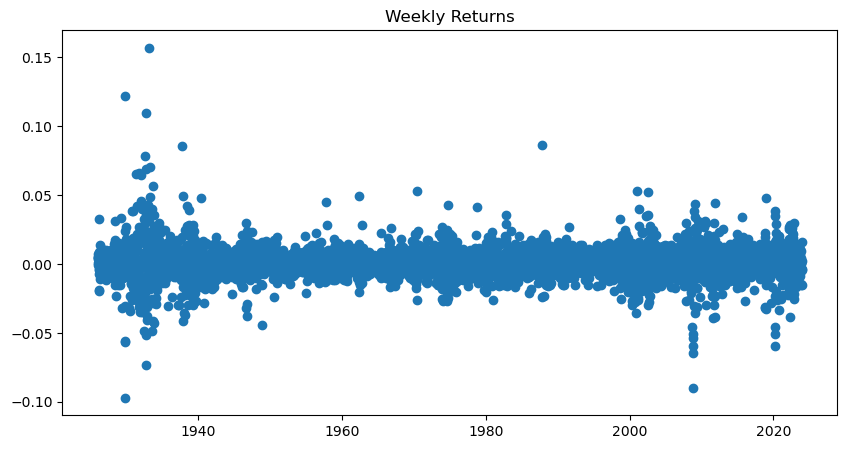

In [167]:
#Scatter Plot for Exec Summary
import matplotlib.pyplot as plt

print(weekly_returns.columns)

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(weekly_returns.index, weekly_returns['VW_Return'])
ax.set_title('Weekly Returns')

plt.show()

In [168]:
#get descriptive stats
weekly_returns.describe()

,VW_Return,EW_Return
count,5114.000000,5114.000000
mean,0.001003,0.001401
std,0.011019,0.011195
min,-0.097020,-0.107698
25%,-0.003569,-0.002723
50%,0.001185,0.001652
75%,0.005496,0.005489
max,0.156838,0.203020


In [169]:
#get skewness and kurtosis
skew4 = weekly_returns.skew()
print(skew4)
kurt4 = weekly_returns.kurt() - 3
print(kurt4)

VW_Return    0.970892
EW_Return    2.076421
dtype: float64
VW_Return    17.799758
EW_Return    41.856248
dtype: float64


In [170]:
#perform normality tests based on assumptions
normality_skew4 = skew4.apply(check_normality_skew)
print(normality_skew4)

normality_kurt4 = kurt4.apply(check_normality_kurt)
print(normality_kurt4)

VW_Return    abnormal skew
EW_Return    abnormal skew
dtype: object
VW_Return    abnormal kurt
EW_Return    abnormal kurt
dtype: object
